<a href="https://colab.research.google.com/github/Bhawana874/Supervised-Learning-Log-Analysis/blob/main/Supervised_UNSW_NB15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving UNSW_NB15_testing-set.csv to UNSW_NB15_testing-set.csv
Saving UNSW_NB15_training-set.csv to UNSW_NB15_training-set.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier



In [3]:
train_df = pd.read_csv("UNSW_NB15_training-set.csv")
test_df = pd.read_csv("UNSW_NB15_testing-set.csv")

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

train_df.head()


Training set shape: (175341, 45)
Testing set shape: (82332, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [4]:
print(train_df.isnull().sum().sum())
print(test_df.isnull().sum().sum())


0
0


In [5]:
# Combine train and test for consistent encoding
combined_df = pd.concat([train_df, test_df], axis=0)

# Encode protocol, service, and state columns if present
categorical_cols = ['proto', 'service', 'state']
le = LabelEncoder()

for col in categorical_cols:
    if col in combined_df.columns:
        combined_df[col] = le.fit_transform(combined_df[col].astype(str))

# Split back to train and test
train_df = combined_df.iloc[:len(train_df)]
test_df = combined_df.iloc[len(train_df):]


In [6]:
target_col = 'label'  # Or 'attack_cat' if you're classifying attack types

X_train = train_df.drop([target_col], axis=1)
y_train = train_df[target_col]

X_test = test_df.drop([target_col], axis=1)
y_test = test_df[target_col]


In [7]:
# %%
target_col = 'label'  # Or 'attack_cat' if you're classifying attack types

# Drop both the target column and the 'attack_cat' column if it exists and is not the target
columns_to_drop = [target_col]
if 'attack_cat' in train_df.columns and 'attack_cat' not in columns_to_drop:
    columns_to_drop.append('attack_cat')

X_train = train_df.drop(columns=columns_to_drop, axis=1)
y_train = train_df[target_col]

# Apply the same drops to the test set
columns_to_drop_test = [target_col]
if 'attack_cat' in test_df.columns and 'attack_cat' not in columns_to_drop_test:
     columns_to_drop_test.append('attack_cat')

X_test = test_df.drop(columns=columns_to_drop_test, axis=1)
y_test = test_df[target_col]


# %%
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.68      0.57     37000
           1       0.61      0.40      0.48     45332

    accuracy                           0.53     82332
   macro avg       0.54      0.54      0.52     82332
weighted avg       0.55      0.53      0.52     82332

Confusion Matrix:
 [[25330 11670]
 [27326 18006]]


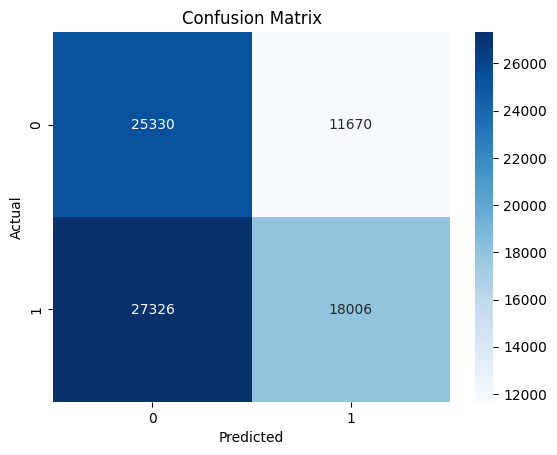

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [9]:
!pip install xgboost


In [10]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_scaled, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:49:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb = xgb_clf.predict(X_test_scaled)

from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.66      0.57     37000
           1       0.62      0.45      0.52     45332

    accuracy                           0.54     82332
   macro avg       0.56      0.55      0.54     82332
weighted avg       0.56      0.54      0.54     82332

Confusion Matrix:
 [[24408 12592]
 [24960 20372]]


<Axes: xlabel='label', ylabel='count'>

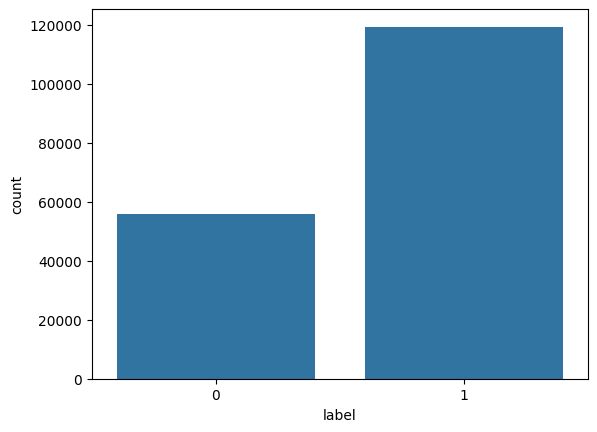

In [ ]:
import seaborn as sns
sns.countplot(x=y_train)


In [15]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Check new distribution
from collections import Counter
print("After SMOTE:", Counter(y_train_smote))


After SMOTE: Counter({0: 119341, 1: 119341})


In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_smote, y_train_smote)
y_pred_lr = lr.predict(X_test_scaled)

print("LR Report:\n", classification_report(y_test, y_pred_lr))


LR Report:
               precision    recall  f1-score   support

           0       0.58      0.76      0.65     37000
           1       0.73      0.55      0.63     45332

    accuracy                           0.64     82332
   macro avg       0.66      0.65      0.64     82332
weighted avg       0.66      0.64      0.64     82332



In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_smote, y_train_smote, epochs=10, batch_size=256, validation_split=0.1)

y_pred_ann = (model.predict(X_test_scaled) > 0.5).astype("int32")

from sklearn.metrics import classification_report
print("ANN Report:\n", classification_report(y_test, y_pred_ann))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8983 - loss: 0.2201 - val_accuracy: 0.9263 - val_loss: 0.1552
Epoch 2/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9505 - loss: 0.1118 - val_accuracy: 0.9555 - val_loss: 0.0945
Epoch 3/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9550 - loss: 0.0993 - val_accuracy: 0.9465 - val_loss: 0.1036
Epoch 4/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9602 - loss: 0.0865 - val_accuracy: 0.9445 - val_loss: 0.1055
Epoch 5/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9648 - loss: 0.0769 - val_accuracy: 0.9434 - val_loss: 0.1077
Epoch 6/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9664 - loss: 0.0717 - val_accuracy: 0.9575 - val_loss: 0.0857
Epoch 7/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9686 - loss: 0.0688 - val_accuracy: 0.9519 - val_loss: 0.0940
Epoch 8/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9697 - loss: 0.0662 - val_accuracy: 0.

In [18]:
!pip install xgboost imbalanced-learn scikit-learn


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier


In [21]:
# Load data
train_df = pd.read_csv("UNSW_NB15_training-set.csv")
test_df = pd.read_csv("UNSW_NB15_testing-set.csv")

# Combine for consistent encoding
combined = pd.concat([train_df, test_df])

# Encode specified categorical columns
categorical_cols = ['proto', 'service', 'state']
for col in categorical_cols:
    if col in combined.columns:
        combined[col] = LabelEncoder().fit_transform(combined[col].astype(str))

# Separate back into train and test sets
train_df = combined.iloc[:len(train_df)]
test_df = combined.iloc[len(train_df):]

target = 'label'

# Define columns to drop (target and attack_cat if present)
columns_to_drop = [target]
if 'attack_cat' in train_df.columns and 'attack_cat' not in columns_to_drop:
    columns_to_drop.append('attack_cat')

# Drop specified columns
X_train = train_df.drop(columns=columns_to_drop, axis=1)
y_train = train_df[target]

# Apply the same drops to the test set
columns_to_drop_test = [target]
if 'attack_cat' in test_df.columns and 'attack_cat' not in columns_to_drop_test:
     columns_to_drop_test.append('attack_cat')
X_test = test_df.drop(columns=columns_to_drop_test, axis=1)
y_test = test_df[target]

# Identify and drop non-numeric columns *before* scaling
# Get non-numeric columns in X_train
non_numeric_cols_train = X_train.select_dtypes(exclude=[np.number]).columns

# Drop non-numeric columns from X_train
if len(non_numeric_cols_train) > 0:
    print(f"Dropping non-numeric columns from X_train: {list(non_numeric_cols_train)}")
    X_train = X_train.drop(columns=non_numeric_cols_train)

# Get non-numeric columns in X_test
non_numeric_cols_test = X_test.select_dtypes(exclude=[np.number]).columns

# Drop non-numeric columns from X_test
# Ensure the same columns dropped from train are also dropped from test if they exist
cols_to_drop_from_test = [col for col in non_numeric_cols_train if col in X_test.columns]
if len(cols_to_drop_from_test) > 0:
    print(f"Dropping corresponding non-numeric columns from X_test: {cols_to_drop_from_test}")
    X_test = X_test.drop(columns=cols_to_drop_from_test)
elif len(non_numeric_cols_test) > 0:
     # In case test set has non-numeric columns that train set didn't have (less common scenario)
     print(f"Dropping non-numeric columns unique to X_test: {list(non_numeric_cols_test)}")
     X_test = X_test.drop(columns=non_numeric_cols_test)


# Initialize and fit the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled should be numpy arrays containing only numeric data
print("Scaling complete.")
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)


Scaling complete.
Shape of X_train_scaled: (175341, 43)
Shape of X_test_scaled: (82332, 43)


In [22]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)


In [23]:
params = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1],
    'scale_pos_weight': [1, 2, 5],  # To handle imbalance
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid = GridSearchCV(
    estimator=xgb,
    param_grid=params,
    scoring='precision',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train_balanced, y_train_balanced)
print("Best Params:", grid.best_params_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:02:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Params: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'scale_pos_weight': 1}


In [24]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

precision = precision_score(y_test, y_pred)
print("Test Precision:", precision)


Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.70      0.57     37000
           1       0.61      0.40      0.48     45332

    accuracy                           0.53     82332
   macro avg       0.55      0.55      0.53     82332
weighted avg       0.56      0.53      0.52     82332

Confusion Matrix:
 [[25728 11272]
 [27342 17990]]
Test Precision: 0.6147905132936915


In [25]:
from sklearn.metrics import make_scorer, precision_score
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV

scorer = make_scorer(precision_score, pos_label=1)
# Assuming xgb and params are defined in previous cells and accessible
# Make sure xgb (XGBClassifier) and params dictionary are available in this scope
grid = GridSearchCV(xgb, param_grid=params, scoring=scorer, cv=3)


In [26]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=20)  # Try top 20 features
X_train_selected = selector.fit_transform(X_train_balanced, y_train_balanced)
X_test_selected = selector.transform(X_test_scaled)


In [27]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

estimators = [
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('rf', RandomForestClassifier(n_estimators=100)),
]

stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack_model.fit(X_train_balanced, y_train_balanced)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:02:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:03:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:03:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:04:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:04:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [28]:
!pip install lightgbm

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(class_weight='balanced', random_state=42)
lgbm.fit(X_train_balanced, y_train_balanced)
y_pred = lgbm.predict(X_test_scaled)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 119341, number of negative: 119341
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.147490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7808
[LightGBM] [Info] Number of data points in the train set: 238682, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [30]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)



Test Accuracy: 0.5336442695428266


In [42]:
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]
y_pred_thresh = (y_proba > 0.7).astype(int)  # Try 0.6, 0.7, etc.



In [43]:
y_pred_thresh = (y_proba > 0.7).astype(int)


In [44]:
accuracy = accuracy_score(y_test, y_pred_thresh)
print("Test Accuracy (Threshold=0.6):", accuracy)


Test Accuracy (Threshold=0.6): 0.556600106884322


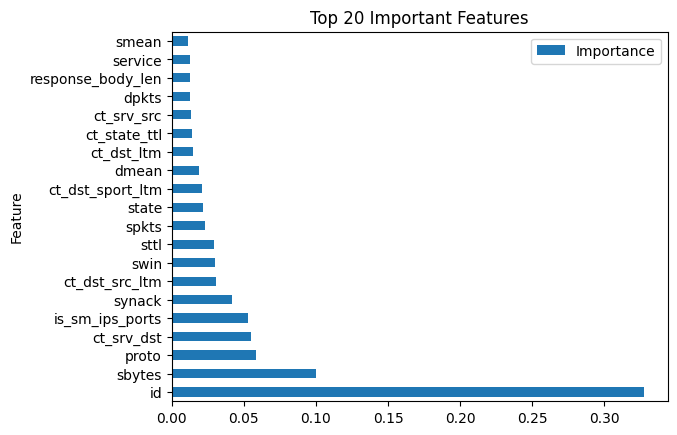

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

feat_importance = best_model.feature_importances_
feat_names = X_train.columns  # Use your actual feature names here

feat_df = pd.DataFrame({'Feature': feat_names, 'Importance': feat_importance})
feat_df.sort_values(by='Importance', ascending=False).head(20).plot(kind='barh', x='Feature', y='Importance')
plt.title("Top 20 Important Features")
plt.show()


In [46]:
# Drop specified columns from both train and test sets
cols_to_drop = ['smean', 'service', 'response_body_len', 'dpkts','ct_srv_src','ct_state_ttl','ct_dst_ltm','dmean']  # Replace with actual column names

X_train_dropped = X_train.drop(columns=cols_to_drop)
X_test_dropped = X_test.drop(columns=cols_to_drop)


In [47]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=20)
X_train_new = selector.fit_transform(X_train_balanced, y_train_balanced)
X_test_new = selector.transform(X_test_scaled)


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train_balanced, epochs=10, batch_size=256, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8657 - loss: 0.3070 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 2/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9369 - loss: 0.1538 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 3/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9421 - loss: 0.1388 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 4/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9488 - loss: 0.1227 - val_accuracy: 1.0000 - val_loss: 8.5318e-04
Epoch 5/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9525 - loss: 0.1134 - val_accuracy: 1.0000 - val_loss: 3.9760e-04
Epoch 6/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9566 - loss: 0.1039 - val_accuracy: 1.0000 - val_loss: 2.3152e-04
Epoch 7/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9591 - loss: 0.0985 - val_accuracy: 1.0000 - val_loss: 1.5614e-04
Epoch 8/10
548/548 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9610 - loss: 0.0935

In [49]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy (Neural Network):", accuracy)


2573/2573 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3459 - loss: 21.9604
Test Accuracy (Neural Network): 0.5464218258857727


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dropped)
X_test_scaled = scaler.transform(X_test_dropped)
